# **Costomer Churn Prediction and Retention Strategy**

The main goal of this Project is to predict which telecom customers are most likely to leave the company(churn) so that the retension team can take early action and reduce churn rate

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve, accuracy_score
)
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load the dataset
path = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(path)

# Data Profiling

In [ ]:
# Show first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1779,5091-HFAZW,Female,0,No,No,2,Yes,No,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,91.15,168.5,No
1883,8840-DQLGN,Female,1,Yes,No,35,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Bank transfer (automatic),100.50,3653.35,Yes
4123,8910-LEDAG,Male,1,Yes,No,34,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),71.55,2427.35,No
2025,1488-PBLJN,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.85,8477.7,No
3657,8450-LUGUK,Female,0,Yes,Yes,37,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.10,861.85,No


In [ ]:
# show number of rows and columns present
df.shape

(7043, 21)

In [ ]:
# show column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# show datatypes
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# show datatype and non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# show count of unique values
df.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [ ]:
# show number of non-missing (non-NaN) values in each column
df.count()

,0
customerID,7043
gender,7043
SeniorCitizen,7043
Partner,7043
Dependents,7043
tenure,7043
PhoneService,7043
MultipleLines,7043
InternetService,7043
OnlineSecurity,7043


In [ ]:
# show summary statistics of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# show total no.of duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
# show no.of null values
df.isnull().sum().sum()

np.int64(0)

In [ ]:
# show which column has null values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Checking for outliers using IQR method
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Calculate outliers for each column using broadcasting
outliers = ((df.select_dtypes(include=np.number) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(include=np.number) > (Q3 + 1.5 * IQR))).sum()
outliers

,0
SeniorCitizen,1142
tenure,0
MonthlyCharges,0


# Data cleaning & preprocessing

In [ ]:
df_clean = df.copy()

In [ ]:
# Remove extra spaces in column names
df_clean.columns = df_clean.columns.str.strip()
# Remove extra spaces inside string (object) columns
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].str.strip()

In [ ]:
# Convert 'TotalCharges' to numeric, force errors to NaN
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Check how many became NaN
print("Missing TotalCharges:", df_clean['TotalCharges'].isna().sum())

# Fill missing TotalCharges with 0 (or you can fill with median if you prefer)
df_clean['TotalCharges'].fillna(0, inplace=True)


Missing TotalCharges: 11


In [ ]:
# Replace “No internet service” / “No phone service” with “No”
cols_replace = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
for c in cols_replace:
    if c in df_clean.columns:
        df_clean[c] = df_clean[c].replace({'No internet service': 'No'})

if 'MultipleLines' in df_clean.columns:
    df_clean['MultipleLines'] = df_clean['MultipleLines'].replace({'No phone service': 'No'})

In [ ]:
# Tenure buckets for visualization
df_clean['tenure_bucket'] = pd.cut(df_clean['tenure'],
                                   bins=[0, 6, 12, 24, 48, 72],
                                   labels=['0-6', '7-12', '13-24', '25-48', '49-72'])

print("Rows after cleaning:", df_clean.shape[0])

Rows after cleaning: 7043


In [ ]:
# Select numeric columns to scale
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric columns
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

# Check the result
df_clean[num_cols].head()


,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.992611
1,0.066327,-0.259629,-0.172165
2,-1.236724,-0.362660,-0.958066
3,0.514251,-0.746535,-0.193672
4,-1.236724,0.197365,-0.938874


In [ ]:
# Descriptive Statistics
df_description = df_clean.describe()
df_description

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7.043000e+03,7.043000e+03,7.043000e+03
mean,0.162147,-2.421273e-17,-6.406285e-17,-3.783239e-17
std,0.368612,1.000071e+00,1.000071e+00,1.000071e+00
min,0.000000,-1.318165e+00,-1.545860e+00,-1.005780e+00
25%,0.000000,-9.516817e-01,-9.725399e-01,-8.299464e-01
50%,0.000000,-1.372744e-01,1.857327e-01,-3.905282e-01
75%,0.000000,9.214551e-01,8.338335e-01,6.648034e-01
max,1.000000,1.613701e+00,1.794352e+00,2.825806e+00


# Exploratory Data Analysis (EDA)

In [ ]:
# Churn rate
print("\nChurn rate (%):")
print(df_clean['Churn'].value_counts(normalize=True).mul(100).round(2))


Churn rate (%):
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


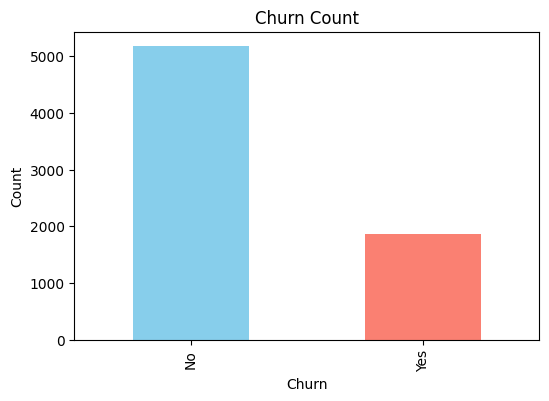

In [ ]:
# Plot churn counts
plt.figure(figsize=(6,4))
df_clean['Churn'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

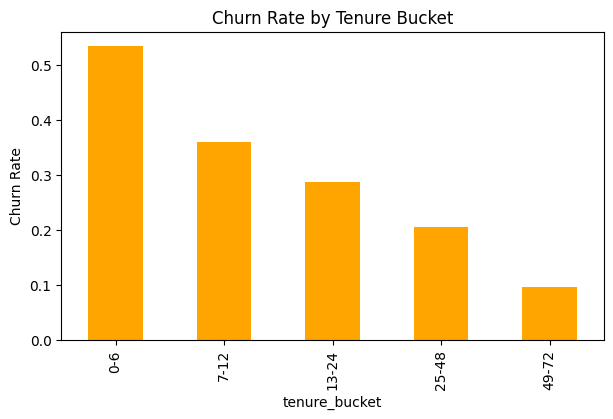

In [ ]:
# Tenure bucket vs churn
plt.figure(figsize=(7,4))
(df_clean.groupby('tenure_bucket')['Churn']
 .apply(lambda x: (x=='Yes').mean())
 .plot(kind='bar', color='orange'))
plt.title('Churn Rate by Tenure Bucket')
plt.ylabel('Churn Rate')
plt.show()

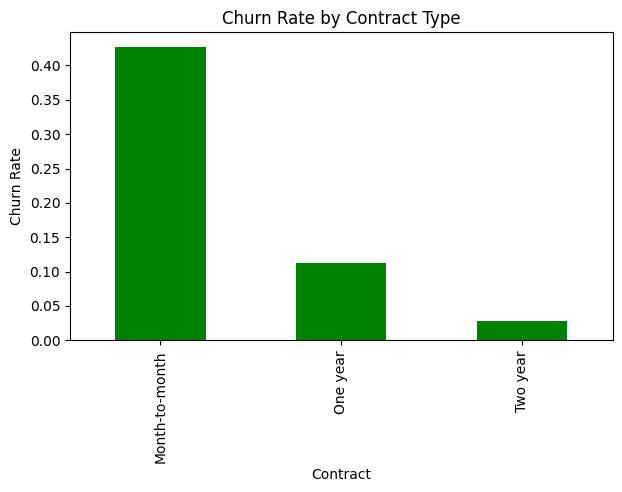

In [ ]:
# Contract vs churn
plt.figure(figsize=(7,4))
(df_clean.groupby('Contract')['Churn']
 .apply(lambda x: (x=='Yes').mean())
 .sort_values(ascending=False)
 .plot(kind='bar', color='green'))
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()

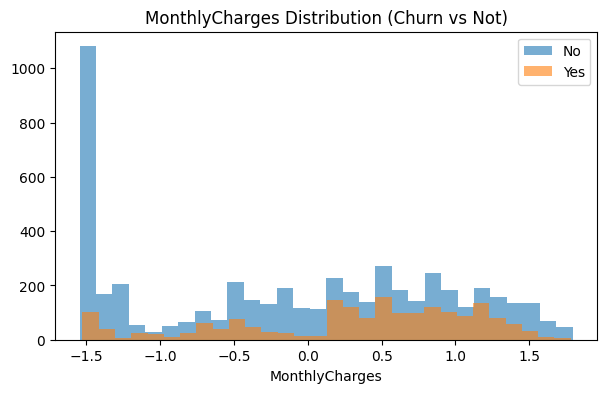

In [ ]:
# MonthlyCharges distribution by churn
plt.figure(figsize=(7,4))
plt.hist(df_clean[df_clean['Churn']=='No']['MonthlyCharges'], bins=30, alpha=0.6, label='No')
plt.hist(df_clean[df_clean['Churn']=='Yes']['MonthlyCharges'], bins=30, alpha=0.6, label='Yes')
plt.legend()
plt.title('MonthlyCharges Distribution (Churn vs Not)')
plt.xlabel('MonthlyCharges')
plt.show()

# Prepare data for modeling

In [ ]:
# Target variable
y = df_clean['Churn'].map({'No': 0, 'Yes': 1})


In [ ]:
# Feature selection
feature_cols = [
    'gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines',
    'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
    'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
    'MonthlyCharges','TotalCharges'
]
X = df_clean[feature_cols]

In [ ]:
# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Train Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:,1]

print("Logistic Regression Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr),4))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_lr),4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 0.8075
ROC AUC: 0.8467

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1294
           1       0.66      0.56      0.61       467

    accuracy                           0.81      1761
   macro avg       0.76      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761



# Train Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf),4))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_rf),4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.7888
ROC AUC: 0.8284

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1294
           1       0.63      0.48      0.55       467

    accuracy                           0.79      1761
   macro avg       0.73      0.69      0.70      1761
weighted avg       0.78      0.79      0.78      1761



# Feature Importance

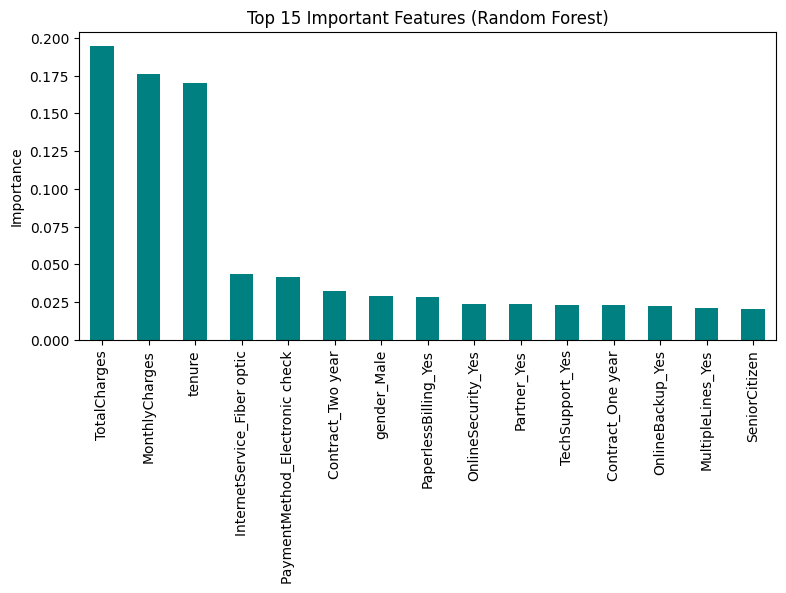

,0
TotalCharges,0.194324
MonthlyCharges,0.176152
tenure,0.170057
InternetService_Fiber optic,0.043636
PaymentMethod_Electronic check,0.041474
Contract_Two year,0.032285
gender_Male,0.029052
PaperlessBilling_Yes,0.028252
OnlineSecurity_Yes,0.023676
Partner_Yes,0.023618


In [ ]:
# Feature Importance
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.head(15).plot(kind='bar', figsize=(9,4), color='teal')
plt.title('Top 15 Important Features (Random Forest)')
plt.ylabel('Importance')
plt.show()

feat_imp.head(15)


# ROC Curve Comparison

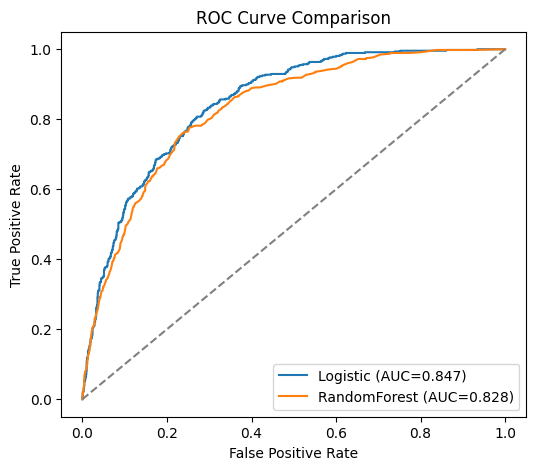

In [ ]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic (AUC={roc_auc_score(y_test,y_proba_lr):.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest (AUC={roc_auc_score(y_test,y_proba_rf):.3f})')
plt.plot([0,1],[0,1],'--',color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


# Top 10 highest churn-risk customers

In [ ]:
test_df = df_clean.loc[X_test.index].copy()
test_df['Churn_Probability'] = y_proba_rf
top_risky = test_df.sort_values('Churn_Probability', ascending=False).head(10)
top_risky[['customerID','gender','SeniorCitizen','tenure','Contract',
           'MonthlyCharges','TotalCharges','Churn_Probability']]


,customerID,gender,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn_Probability
6623,9248-OJYKK,Male,1,-1.277445,Month-to-month,0.388472,-0.972051,1.000
809,1820-TQVEV,Male,0,-1.277445,Month-to-month,0.159144,-0.975096,1.000
6488,0488-GSLFR,Female,0,-1.277445,Month-to-month,0.157482,-0.975118,1.000
1731,8375-DKEBR,Female,1,-1.277445,Month-to-month,0.160806,-0.975074,1.000
6495,7254-IQWOZ,Male,0,-1.277445,Month-to-month,0.162467,-0.975051,1.000
1739,9804-ICWBG,Male,0,-1.277445,Month-to-month,0.170776,-0.974941,0.995
2194,2514-GINMM,Male,0,-1.277445,Month-to-month,0.489842,-0.970706,0.995
2927,5542-TBBWB,Male,0,-1.277445,Month-to-month,0.170776,-0.974941,0.995
4585,1069-XAIEM,Female,1,-1.277445,Month-to-month,0.674301,-0.968257,0.985
3682,3716-BDVDB,Male,0,-1.277445,Month-to-month,0.144188,-0.975294,0.980


# Retention Strategy (Action Plan)

**Retention Recommendations Based on Insights:**

1.Offer loyalty discounts or long-term plans to customers with short tenure.

2.Reduce billing surprises for high 'MonthlyCharges' customers through flexible plans.

3.Provide special care for customers with multiple complaints or service issues.

4.Improve customer service for 'Fiber optic' and 'Internet' service users (common churn reasons).

5.Send personalized retention messages to at-risk customers.


**Example Personalized Retention Messages:**

1. For high-risk customer (short tenure, high charge):
   "Hi, we noticed you’ve been with us for a few months.
   To thank you, we’re offering a 20% discount on your next bill!"

2. For long-term customer showing churn signals:
   "Thank you for being a loyal customer! We’d love to keep you with us.
   Here’s a free upgrade to our new high-speed plan."

3. For complaint-heavy users:
   "We’re sorry for your past issues. Your feedback matters .
   we’re assigning you a dedicated support manager to ensure everything runs smoothly."
